# <span style="color:blue">Quantização de Sinais Discretos</span>

## Fundamentação Teórica - Quantização

### Modelo do Processo de Quantização 

<p>Vamos formular um modelo do processo de **quantização** (quantificação) a fim de se conhecer os efeitos dessa operação num sinal de amplitude contínua. Restringimos nossas considerações a um sinal discreto de valor real $x[k]$. Para mapear a amplitude contínua para uma representação quantizada, propõe-se o seguinte modelo:
$$x_Q[k]=g(\left \lfloor\, f(x[k])\right \rfloor)$$
onde $g(\cdot)$ e $f(\cdot)$ denotam funções de mapeamento de valor real e $\left\lfloor\cdot\right\rfloor$ denota uma operação de arredondamento. 
<p>O processo de quantização pode ser dividido em duas etapas:
<ol><li>**Quantização para frente**: O mapeamento $f(x[k])$ mapeia o sinal $x[k]$ de modo que ele fique adequado à operação de arredondamento. Isso pode ser um escalonamento do sinal ou um mapeamento não linear. O resultado da operação de arredondamento é um número inteiro $\left\lfloor f(x[k])\right\rfloor \in \mathbb{Z}$ que é denominado *índice de quantização*.</li>
<li>**Quantização inversa**: O mapeamento $g(\cdot)$ mapeia o *índice de quantização* para o valor quantizado $x_Q[k]$ tal que $x_Q[k]$ seja uma aproximação de $x[k]$. Isso pode ser uma operação de escalonamento ou não linear.</li></ol>

<p>O erro de quantização (ou ruído de quantização) $e[k]$ é definido como:$\;\;\;e[k] = x_Q[k] - x[k]$.
<p>Ou seja, o processo de quantização pode ser modelado adicionando-se o ruído de quantização ao sinal discreto:
<p><img src="img\modelo_quantizacao.png">

##### Exemplo

Para ilustrar o modelo proposto, a quantização de um período de um sinal senoidal é considerada: $x[k]=sen[\Omega_0k]$
<p>utilizando $f(x[k])=3.x[k]$ e $g(i)=i/3$. O arredondamento é realizado pela função inteira mais próxima ($ \left \| x  \right \|$). O sinal quantizado é então dado por: $$x_Q[k] = \frac{1}{3}\left\lfloor 3.sen[\Omega_0k] \right \rfloor$$ 

Populating the interactive namespace from numpy and matplotlib


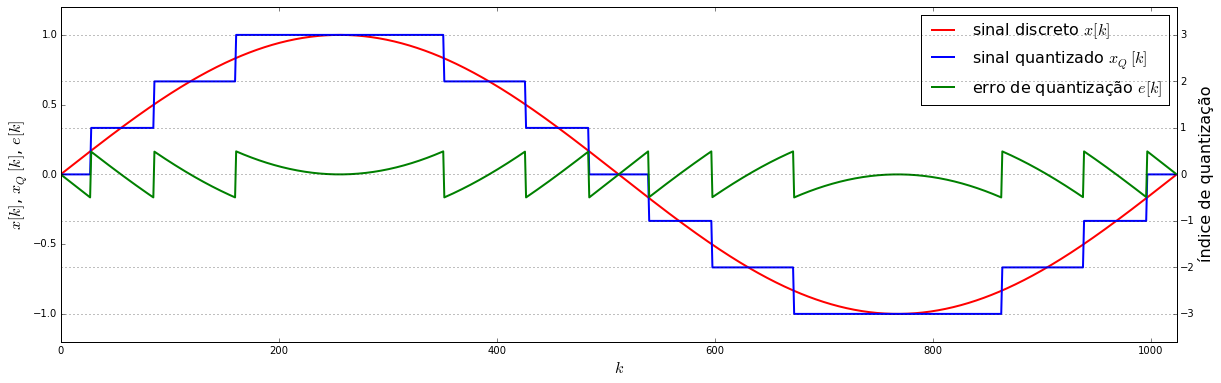

In [14]:
% pylab inline
from numpy import pi, sin, arange, round
from pylab import subplots

N = 1024              # qtde de amostras do sinal
n = arange(N)
x = sin(2*pi/N *n)    # sinal gerado
xi = round(3*x)       # sinal intermediário
xQ = 1./3*xi          # sinal quantizado
e = xQ - x

fig, ax1 = plt.subplots(figsize=(20,6))
ax2 = ax1.twinx()

ax1.plot(x, 'r', label=r'sinal discreto $x[k]$', linewidth=2)
ax1.plot(xQ,'b', label=r'sinal quantizado $x_Q[k]$', linewidth=2)
ax1.plot(e, 'g', label=u'erro de quantização $e[k]$', linewidth=2)
ax1.set_xlabel('$k$', fontsize=16)
ax1.set_ylabel(r'$x[k]$, $x_Q[k]$, $e[k]$',fontsize=16)
ax1.axis([0, N, -1.2, 1.2])
ax1.legend(fontsize=16)

ax2.set_ylim([-3.6, 3.6])
ax2.set_ylabel(u'índice de quantização',fontsize=16)
ax2.grid()

**Exercícios**
<p><ul><li>Investigue o **ruído de quantização**, $e[k]$. Sua amplitude é limitada? </li>
<li>Se você representasse o índice de quantização (mostrado no eixo vertical à direita) por um número binário, quantos bits seriam necessários? </li>
<li>Experimente operações de arredondamento diferentes de *round()*, tais como: *floor()* e *ceil()*. O que muda?</li></ul>

**Conclusão**: a quantização é um processo inerentemente irreversível e não linear.

### Quantizador Linear Uniforme

As características do quantificador dependem das funções de mapeamento $f(\cdot)$, $g(\cdot)$ e da operação de arredondamento $\left\lfloor\cdot\right\rfloor$. Um quantizador é dito ser **linear** quando as suas funções de mapeamento são lineares. 
<p>Um quantizador **uniforme** de $L$ bits, divide a *Faixa de Valores de Amplitude* (R) do sinal de entrada em $2^L-1$ passos de quantização (*quantum*) de tamanhos iguais:<p>$$q=\frac{R}{2^L}$$
<p>Os quantificadores podem ser descritos por sua característica de entrada/saída não linear<p>$$x_Q[k]=\textbf{Q}\{x[k]\}$$ <p>onde $\textbf{Q}\{\cdot\}$ indica o processo de quantização. <p>Na quantização uniforme linear é comum diferenciar entre duas curvas características, as chamadas *mid-tread* (meio passo) e *mid-rise* (meia subida).

### Mid-Tread

O termo *mid-tread* se deve ao fato de que valores menores $|x[k]|<\frac{Q}{2}$ são mapeados para zero.<p>Tem relação entrada/saída do tipo: 
$$x_Q[k]=q.\left\lfloor\frac{x[k]}{q}+\frac{1}{2}\right\rfloor$$

onde $q$ é o *quantum* (tamanho do passo de quantização) e $\left\lfloor\cdot\right\rfloor$ é a função *floor()* que mapeia um número real no maior número inteiro não maior que seu argumento. 
<p>Sem restringir $x[k]$ em amplitude, os índices de quantização resultantes formam um conjunto infinito contável de valores. Para um número finito de índices de quantização, o sinal de entrada deve ser limitado a uma faixa de amplitudes mínima e máxima: $x_{min}<x[k]<x_{max}$ antes da quantização.
<p>A característica de quantização resultante de um quantizador uniforme linear *mid-tread* é mostrada a seguir.
<p><img src="img\carac_mid_tread.png">

#### Exemplo

Vamos simular a quantização de um período do sinal senoidal $x[k]=A.sen(\Omega_0.k)$ por um quantizador *mid-tread*. O parâmetro $A$ indica a amplitude do sinal, e nesse caso, $x_{min}=-A$ e $x_{max}=A$ são os menores e maiores valores de saída do quantizador, respectivamente.

Populating the interactive namespace from numpy and matplotlib


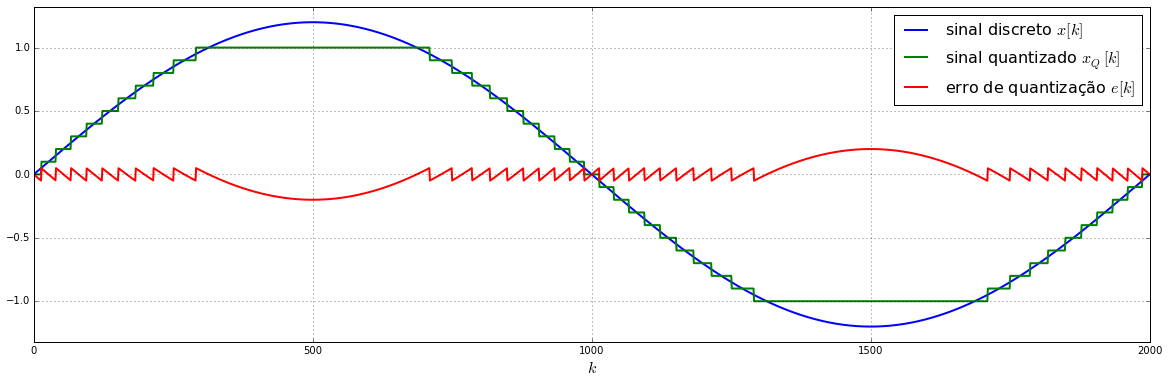

In [1]:
% pylab inline
from numpy import arange, sin, pi, copy, where, sign, floor
from pylab import figure, plot, xlabel, axis, legend, grid

def quantizacao_uniforme_midtread(x,q):
    x = copy(x)                             # cria um novo vetor x (aloca novas posições de memória)
    indices = where(abs(x) >= 1)            # limitador de amplitudes (localiza valores de 'x' entre -1 e 1)
    x[indices] = sign(x[indices])           # atribui a todos os valores localizados amplitudes -1 ou 1
    xQ = q * floor(x/q + 0.5)               # quantização linear uniforme com caract. mid-tread
    return xQ

def plota_sinais(x,amplit,qtdam,xQ):
    e = xQ - x                              # sinal erro de quantização
    figure(figsize=(20,6))
    plot(x, label=r'sinal discreto $x[k]$', linewidth=2)
    plot(xQ,label=r'sinal quantizado $x_Q[k]$', linewidth=2)
    plot(e, label=u'erro de quantização $e[k]$', linewidth=2)
    xlabel(r'$k$', fontsize=16); axis([0, qtdam, -1.1*amplit, 1.1*amplit]); legend(fontsize=16); grid()

A = 1.2                                     # amplitude de pico do sinal
q = 0.1                                     # quantum (passo da quantização)
N = 2000                                    # qtde de amostras
x = A * sin(2*pi/N * arange(N))             # gerando o sinal senoidal discreto
xQ = quantizacao_uniforme_midtread(x,q)     # quantiza o sinal 'x'
plota_sinais(x,A,N,xQ)

**Exercício**:  Altere o passo de quantização **q** e a amplitude **A** do sinal. Qual efeito isso tem no erro de quantização?

### Mid-Rise

O termo *mid-rise* se deve ao fato de que $x[k]=0$ não é mapeado para zero. Pequenos valores positivos/negativos em torno de zero são mapeados para $\pm\frac{q}{2}$.
<p>Tem relação entrada/saída do tipo: 
$$x_Q[k]=q.\left (\left\lfloor\frac{x[k]}{q}\right\rfloor+\frac{1}{2}\right )$$

<p>A característica de quantização resultante de um quantizador uniforme linear *mid-rise* é mostrada a seguir.
<p><img src="img\carac_mid_rise.png">

#### Exemplo

O exemplo mostrado acima é agora avaliado para a característica meia subida (*mid-rise*).

Populating the interactive namespace from numpy and matplotlib


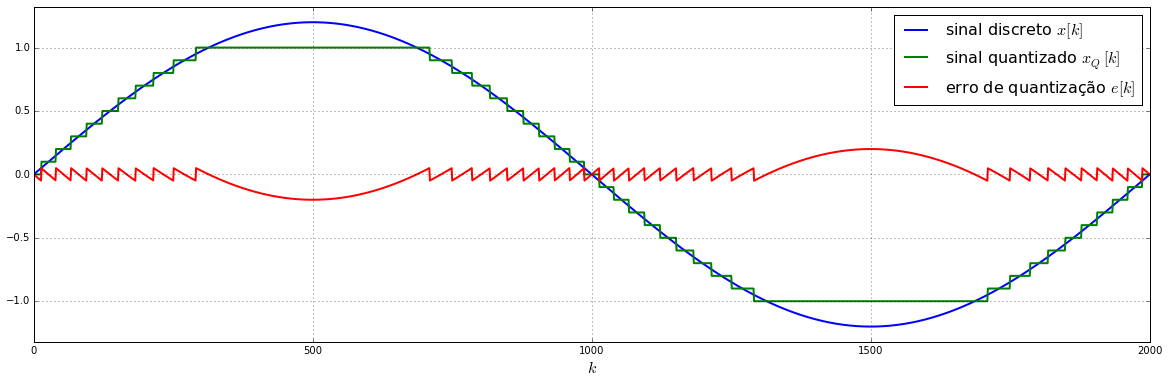

In [5]:
% pylab inline
from numpy import arange, sin, pi, copy, where, sign, floor
from pylab import figure, plot, xlabel, axis, legend, grid

def quantizacao_uniforme_midtrise(x,q):
    x = copy(x)                                       # cria um novo vetor x (aloca novas posições de memória)
    indices = where(abs(x) >= 1)                      # limitador de amplitudes (localiza valores de 'x' entre -1 e 1)
    x[indices] = sign(x[indices])                     # atribui a todos os valores localizados amplitudes -1 ou 1
    xQ = q * floor(x/q) + 0.5                         # quantização linear uniforme com caract. mid-rise
    return xQ

def plota_sinais(x,amplit,qtdam,xQ):
    e = xQ - x                                        # sinal erro de quantização
    figure(figsize=(20,6))
    plot(x, label=r'sinal discreto $x[k]$', linewidth=2)
    plot(xQ,label=r'sinal quantizado $x_Q[k]$', linewidth=2)
    plot(e, label=u'erro de quantização $e[k]$', linewidth=2)
    xlabel(r'$k$', fontsize=16); axis([0, qtdam, -1.1*amplit, 1.1*amplit]); legend(fontsize=16); grid()

A = 1.2                                                # amplitude de pico do sinal
q = 0.1                                                # quantum (passo da quantização)
N = 2000                                               # qtde de amostras
x = A * sin(2*pi/N * arange(N))                        # gerando o sinal senoidal discreto
xQ = quantizacao_uniforme_midtrise(x,q)                # quantiza o sinal 'x'
plota_sinais(x,A,N,xQ)

**Exercício**: Quais são as diferenças entre as curvas características *mid-tread* e *mid-rise* para o exemplo dado?

By **Prof. Cláudio A. Fleury**, Fev/19.